# 改善模型的性能

In [54]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Keras的回调
-  历史
-  提取停止
-  CheckPoint

### 历史回调
历史回调默认情况下每次使用 `.fit()` 方法训练模型时都会返回。要访问这些指标，可以通过相应的键在返回的 `h_callback` 对象内访问历史字典参数。

在上一课中创建的灌溉机模型,我们来加载他一下，现在您加载了其特征和标签作为 `X_train`、`y_train`、`X_test` 和 `y_test`。这次您将存储模型的 `history` 回调，并在训练时使用 `validation_data` 参数。


In [55]:
# 绘制训练和验证准确率数值
def plot_accuracy(acc,val_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')

def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right');

In [56]:
#导入我们之前的数据
irrigation = pd.read_csv('../data/irrigation_machine.csv', index_col=0)
parcels = irrigation[['parcel_0', 'parcel_1', 'parcel_2']].to_numpy()
sensors = irrigation.drop(['parcel_0', 'parcel_1', 'parcel_2'], axis=1).to_numpy()
from sklearn.model_selection import train_test_split
sensors_train, sensors_test, parcels_train, parcels_test = \
    train_test_split(sensors, parcels, test_size=0.3, stratify=parcels)

In [57]:
X_train, y_train = sensors_train, parcels_train
X_test, y_test = sensors_test, parcels_test

In [58]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64,input_shape=(20,),activation='relu'))
model.add(Dense(3,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [59]:
# 训练您的模型并保存其历史记录
h_callback = model.fit(X_train,y_train,epochs=50,validation_data=(X_test, y_test))

Epoch 1/50
44/44 [==============================] - 1s 6ms/step - loss: 0.6897 - accuracy: 0.5000 - val_loss: 0.5172 - val_accuracy: 0.5267
Epoch 2/50
44/44 [==============================] - 0s 4ms/step - loss: 0.4654 - accuracy: 0.5871 - val_loss: 0.4185 - val_accuracy: 0.6150
Epoch 3/50
44/44 [==============================] - 0s 4ms/step - loss: 0.3925 - accuracy: 0.6107 - val_loss: 0.3698 - val_accuracy: 0.6250
Epoch 4/50
44/44 [==============================] - 0s 4ms/step - loss: 0.3500 - accuracy: 0.6279 - val_loss: 0.3370 - val_accuracy: 0.6267
Epoch 5/50
44/44 [==============================] - 0s 4ms/step - loss: 0.3232 - accuracy: 0.6286 - val_loss: 0.3168 - val_accuracy: 0.6533
Epoch 6/50
44/44 [==============================] - 0s 4ms/step - loss: 0.3042 - accuracy: 0.6364 - val_loss: 0.3026 - val_accuracy: 0.6750
Epoch 7/50
44/44 [==============================] - 0s 4ms/step - loss: 0.2890 - accuracy: 0.6357 - val_loss: 0.2888 - val_accuracy: 0.6333
Epoch 8/50
44/44 [==

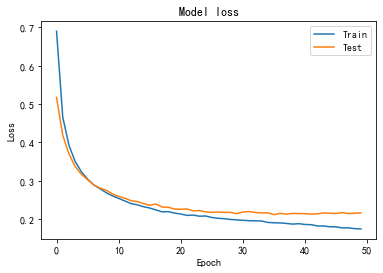

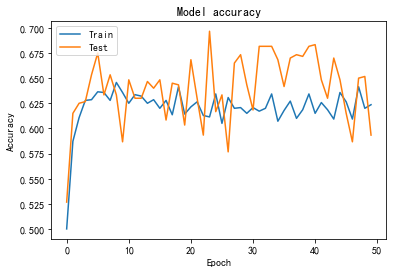

In [60]:
# 绘制训练过程中的训练与测试损失
plot_loss(h_callback.history['loss'],h_callback.history['val_loss'])

# 绘制训练过程中的训练与测试准确率
plot_accuracy(h_callback.history['accuracy'],h_callback.history['val_accuracy'])

### 提前停止的模型
提前停止回调非常有用，因为它允许您在给定的一定数量的 epochs 后停止模型训练，如果模型不再改善。要使用此功能，需要将回调以列表的形式传递给模型的 `.fit()` 方法中的 callback 参数。

您构建的用于检测假美元的 `model` 已加载，这次将使用提前停止进行训练。`X_train`、`y_train`、`X_test` 和 `y_test` 也可供您使用。

In [61]:
banknotes = pd.read_csv('../data/banknotes.csv')
X = banknotes.iloc[:, :4]
X = ((X - X.mean()) / X.std()).to_numpy()
y = banknotes['class'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [62]:
model = Sequential()
model.add(Dense(1, input_shape=(4, ), activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [63]:
#调用EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping


# 定义一个回调来监视 val_acc
monitor_val_acc = EarlyStopping(monitor='val_accuracy',patience=5)

# 使用提前停止回调来训练您的模型
model.fit(X_train, y_train, epochs=100,validation_data=(X_test, y_test),
          callbacks =[monitor_val_acc])

Epoch 1/100
33/33 [==============================] - 0s 7ms/step - loss: 0.3795 - accuracy: 0.8397 - val_loss: 0.3722 - val_accuracy: 0.8367
Epoch 2/100
33/33 [==============================] - 0s 4ms/step - loss: 0.3714 - accuracy: 0.8445 - val_loss: 0.3651 - val_accuracy: 0.8367
Epoch 3/100
33/33 [==============================] - 0s 4ms/step - loss: 0.3637 - accuracy: 0.8484 - val_loss: 0.3583 - val_accuracy: 0.8397
Epoch 4/100
33/33 [==============================] - 0s 4ms/step - loss: 0.3564 - accuracy: 0.8513 - val_loss: 0.3517 - val_accuracy: 0.8455
Epoch 5/100
33/33 [==============================] - 0s 4ms/step - loss: 0.3493 - accuracy: 0.8552 - val_loss: 0.3456 - val_accuracy: 0.8513
Epoch 6/100
33/33 [==============================] - 0s 4ms/step - loss: 0.3426 - accuracy: 0.8591 - val_loss: 0.3396 - val_accuracy: 0.8542
Epoch 7/100
33/33 [==============================] - 0s 4ms/step - loss: 0.3361 - accuracy: 0.8688 - val_loss: 0.3338 - val_accuracy: 0.8571
Epoch 8/100
3

### 保存模型
深度学习模型的训练可能需要很长时间，特别是当转向更深的架构和更大的数据集时。每当模型改善时保存模型，以及在模型不再改善时停止训练，这样可以让不用过多担心选择训练的 epoch 数。还可以随时恢复已保存的模型，并在中断处恢复训练。

使用 `EarlyStopping()` 和 `ModelCheckpoint()` 回调

In [64]:
#导入模型保存所需要的包ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint

# 监控验证准确度进行提前停止
monitor_val_acc = EarlyStopping(monitor='val_accuracy',patience=5)
# 将最佳模型保存为 best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint("./best_banknote_model",save_best_only=True)
# 使用一个10000000的数量的 epochs 对模型进行拟合
h_callback = model.fit(X_train, y_train,
                       epochs=100000000000,
                       callbacks=[monitor_val_acc, modelCheckpoint],
                       validation_data=(X_test, y_test))

Epoch 1/100000000000
33/33 [==============================] - 0s 12ms/step - loss: 0.2016 - accuracy: 0.9563 - val_loss: 0.2096 - val_accuracy: 0.9475
Epoch 2/100000000000
33/33 [==============================] - 0s 11ms/step - loss: 0.1997 - accuracy: 0.9572 - val_loss: 0.2078 - val_accuracy: 0.9475
Epoch 3/100000000000
33/33 [==============================] - 0s 11ms/step - loss: 0.1978 - accuracy: 0.9572 - val_loss: 0.2059 - val_accuracy: 0.9475
Epoch 4/100000000000
33/33 [==============================] - 0s 11ms/step - loss: 0.1959 - accuracy: 0.9572 - val_loss: 0.2042 - val_accuracy: 0.9475
Epoch 5/100000000000
33/33 [==============================] - 0s 11ms/step - loss: 0.1941 - accuracy: 0.9572 - val_loss: 0.2024 - val_accuracy: 0.9504
Epoch 6/100000000000
33/33 [==============================] - 0s 11ms/step - loss: 0.1924 - accuracy: 0.9582 - val_loss: 0.2008 - val_accuracy: 0.9504
Epoch 7/100000000000
33/33 [==============================] - 0s 12ms/step - loss: 0.1907 - ac

## 学习曲线

我们将在数字数据集上构建一个模型,这是一个预加载在scikit-learn中的示例数据集。数字数据集由0到9的8x8像素的手写数字组成:

![digits](../img/digits_dataset_sample.png)
你想要区分给定图像中10种可能数字中的每一种,所以我们正在处理多类分类问题。

该数据集已经被分割成X_train, y_train, X_test和y_test,使用30%的数据作为测试数据。标签已经是one-hot编码的向量,所以你不需要使用Keras的to_categorical()函数。

note:`.npy`是numpy中用于保存数组数据的二进制文件格式。

In [65]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X = np.load('../data/digits_pixels.npy')
y = np.load('../data/digits_target.npy')

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [66]:
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

# 初始化一个Sequential模型
model = Sequential()  

# 输入层和隐藏层,输入大小为64,16个神经元,激活函数为relu
model.add(Dense(16, input_shape=(64, ), activation='relu'))

# 输出层有10个神经元(每个数字一个),激活函数为softmax
model.add(Dense(10, activation='softmax'))  

# 编译模型
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 在训练前测试模型是否组装正确,通过进行预测
print(model.predict(X_train)[0])

40/40 [==============================] - 0s 897us/step
[8.8845398e-03 1.8552195e-09 5.5224803e-09 7.3228734e-06 6.0868750e-08
 1.9560648e-11 5.9024867e-02 2.1972055e-06 1.2615176e-01 8.0592924e-01]


在训练模型之前,可以先对训练数据进行预测,看模型输出的结果,这可以帮助我们快速检查模型在训练之前是否像预期那样工作。
所以这种在训练前的预测可以帮助我们对模型有一个直观的理解,确认模型基本合理再进行训练,可以避免在训练过程中才发现问题。

### 是否过度拟合
让我们训练您刚刚构建的模型并绘制其学习曲线，以检查它是否过度拟合！

In [67]:
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')

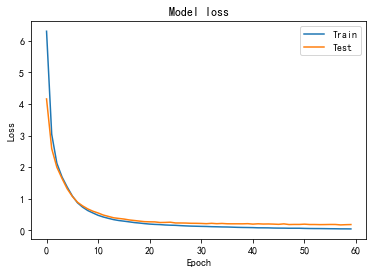

In [68]:
#使用X_test和y_test作为验证数据,训练你的模型60个epoch
h_callback = model.fit(X_train, y_train, epochs=60, validation_data=(X_test, y_test), verbose=0)
#绘制损失曲线
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])


此图显示的不是过拟合，而是收敛。看起来我们的模型已经从数据中学到了所有可能的东西，并且不再改进。测试损失虽然高于训练损失，但并没有变得更糟，因此我们不会过度拟合训练数据

### 我们需要更多的数据嘛？
是时候检查一下构建的数字数据集模型是否可以从更多的训练样本中受益了!

为了使代码量最小化,各种事物已经初始化并准备使用:
- 你刚刚构建的`model`模型。
- `X_train`,`y_train`,`X_test`和`y_test`数据。   
- 在使用`model.get_weights()`后保存的模型的`initial_weights`初始权重。
- 一个预定义的训练数据大小列表:`training_sizes`。
- 一个预定义的监测loss的early stopping回调:`early_stop`。
- 两个空列表来存储评估结果:`train_accs`和`test_accs`。

在不同的训练集大小上训练你的模型,并在`X_test`上评估结果。最后使用plot_results()绘制结果。



In [69]:
def plot_results(train_accs,test_accs):
    plt.plot(training_sizes, train_accs, 'o-', label="Training Accuracy")
    plt.plot(training_sizes, test_accs, 'o-', label="Test Accuracy")
    plt.title('Accuracy vs Number of training samples')
    plt.xlabel('# of training samples')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")

In [70]:
#获取初始权重
initial_weights = model.get_weights()

Epoch 1/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0458 - accuracy: 0.9840
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9840
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 1.0000
Epoch 4/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0329 - accuracy: 1.0000
Epoch 5/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0304 - accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0286 - accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0270 - accuracy: 1.0000
Epoch 8/50
4/4 [==============================] - 0s 3ms/step - loss: 0.0253 - accuracy: 1.0000
Epoch 9/50
4/4 [==============================] - 0s 7ms/step - loss: 0.0243 - accuracy: 1.0000
Epoch 10/50
4/4 [==============================] - 0s 4ms/step - loss: 0.0228 - accuracy: 1.0000
Epoch 11/50
4/4 [======================

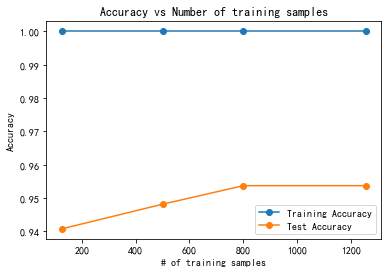

In [71]:
#从tensorflow.keras.callbacks 导入 EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

#实例化EarlyStopping
early_stop = EarlyStopping(monitor='loss',patience=5)

# 初始化训练集准确度和测试集准确度列表
train_accs,test_accs=[],[]

# 不同的训练集大小
training_sizes = [125,500,800,1255]


for  size in training_sizes:
    # 获取训练数据的一部分(我们只关心训练数据)
    X_train_frac,y_train_frac = X_train[:size],y_train[:size]
    # 将模型重置为初始权重,并在新的训练数据部分上训练
    model.set_weights(initial_weights)
    model.fit(X_train_frac,y_train_frac,epochs=50,callbacks=[early_stop])
    # 计算并存储训练数据部分和完整测试集的结果
    train_accs.append(model.evaluate(X_train_frac, y_train_frac)[1])
    test_accs.append(model.evaluate(X_test, y_test)[1])

#绘制训练与测试精度图表
plot_results(train_accs, test_accs)

## 批量大小和批量标准化
- Mini-batches
    - 优势
        - 网络训练更快（在相同时间内进行更多的权重更新）
        - 需要更少的 RAM 内存，可以用于大型数据集的训练
        - 噪声有助于网络达到更低的误差，逃离局部最小值
    - 缺点
        - 需要运行更多的迭代
        - 需要调整，我们需要找到一个好的批量大小

- 批量标准化
    - 优点
        - 改善梯度流动
        - 允许更高的学习率
        - 减少对权重初始化的依赖
        - 作为一种意外的正则化形式
        - 限制了批量归一化。

### 更改批量大小

让我们看看不同的批量大小如何影响简单的二元分类模型的准确性，该模型将红点与蓝点分开（之前二分类课程PPT部分案例）。

模型通常是以固定大小的批量进行训练的。批量大小越小，每个epoch的权重更新次数就越多，但代价是梯度下降更加不稳定，特别是如果批量大小太小，并且不能代表整个训练集。

使用批量大小为2，在每个epoch为您的训练集中的每个样本更新175次权重。然后，使用整个数据集，在每个epoch只更新一次权重。

In [72]:
dots = pd.read_csv('../data/dots.csv')
dots.head()

,0,1,2
0,0.242655,0.038320,1
1,0.044330,-0.056673,1
2,-0.786777,-0.757186,0
3,0.004067,0.131172,1
4,-0.164107,0.150650,1


In [73]:
X = dots.iloc[:, :-1]
y = dots.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [74]:
def get_model():
    model = Sequential()
    model.add(Dense(4,input_shape=(2,),activation='relu'))
    model.add(Dense(1,activation="sigmoid"))
    model.compile('sgd', 'binary_crossentropy', metrics=['accuracy'])
    return model

In [75]:
# 通过 get_model 获取一个全新的模型
model = get_model()

# 使用批量大小为 4 训练模型 5 个时期
model.fit(X_train,y_train,epochs=5,batch_size=4)
print("\n 当使用批量大小为 4时的准确性为: ", model.evaluate(X_test, y_test)[1])

Epoch 1/5
175/175 [==============================] - 1s 2ms/step - loss: 0.7335 - accuracy: 0.4743
Epoch 2/5
175/175 [==============================] - 0s 2ms/step - loss: 0.7053 - accuracy: 0.4057
Epoch 3/5
175/175 [==============================] - 0s 2ms/step - loss: 0.6803 - accuracy: 0.5157
Epoch 4/5
175/175 [==============================] - 0s 2ms/step - loss: 0.6592 - accuracy: 0.5814
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.6408 - accuracy: 0.6167

 当使用批量大小为 4时的准确性为:  0.6166666746139526


In [76]:
model = get_model()

# 使用整个训练集作为批量大小，训练模型 5 个时期
model.fit(X_train,y_train,epochs=10,batch_size=X_train.shape[0])

print("\n 当将整个训练集作为批量大小时的准确性为：", model.evaluate(X_test, y_test)[1])

Epoch 1/10
1/1 [==============================] - 0s 214ms/step - loss: 0.7048 - accuracy: 0.4886
Epoch 2/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7047 - accuracy: 0.4957
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 0.7046 - accuracy: 0.4957
Epoch 4/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7045 - accuracy: 0.4957
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7044 - accuracy: 0.4957
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7042 - accuracy: 0.4943
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7041 - accuracy: 0.4957
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7040 - accuracy: 0.4971
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 0.7039 - accuracy: 0.5000
Epoch 10/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7039 - accuracy: 0.4867

 当将整个训练集作为批量大小时的准确性为： 0.4866666793

当使用与训练集大小相等的批量大小时，准确度较低。这并不是因为网络在学习优化函数时遇到了更多困难：尽管两种批量大小都使用了相同数量的时期，但产生的权重更新次数却大相径庭！使用训练集大小的批量和 5 个时期，我们只总共进行了 5 次更新，每次更新都需要计算并平均梯度下降，涵盖了所有训练集观测。要以这种批量大小获得类似的结果，我们应该增加时期的数量，以便进行更多的权重更新。

## 对一个熟悉的模型进行批量标准化
![digits](../img/digits_dataset_sample.png)
你之前使用 softmax 和输出层的 10 个神经元解决的是一个多类分类问题。

现在，将构建一个更深的新模型，其中包括 3 个隐藏层，每层有 50 个神经元，并在层与层之间使用批量标准化。kernel_initializer 参数用于初始化权重。

In [77]:
from tensorflow.keras.layers import BatchNormalization

# 构建深度网络
batchnorm_model = Sequential()
batchnorm_model.add(Dense(50,input_shape=(64,),activation='relu',kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))

# 使用随机梯度下降（SGD）编译模型
batchnorm_model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

### 批量标准化的影响
批量标准化倾向于提高模型的学习速度并使它们的学习曲线更稳定。让我们看看具有和不具有批量标准化的两个相同模型之间的比较。

刚刚构建的模型 `batchnorm_model` 已经加载好供您使用。同样的没有批量标准化的模型 `standard_model` 也准备好了。

您将比较两个模型的准确率学习曲线，将它们绘制在一起使用 `compare_histories_acc()`。

In [78]:
plt.rcParams['font.sans-serif']=['SimHei']  # 设置中文显示
plt.rcParams['axes.unicode_minus']=False 
def compare_histories_acc(h1, h2):
    plt.plot(h1.history['accuracy'])
    plt.plot(h1.history['val_accuracy'])
    plt.plot(h2.history['accuracy'])
    plt.plot(h2.history['val_accuracy'])
    plt.title("批量标准化效果")
    plt.xlabel('时期')
    plt.ylabel('准确率')
    plt.legend(['训练', '测试', '使用批量标准化的训练', '使用批量标准化的测试'], loc='best')

In [79]:
X = np.load('../data/digits_pixels.npy')
y = np.load('../data/digits_target.npy')

y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [80]:
# 构建你的标准深度网络，即不使用批量的标准化
standard_model = Sequential()
standard_model.add(Dense(50, input_shape=(64, ), activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(50, activation='relu', kernel_initializer='normal'))
standard_model.add(Dense(10, activation='softmax', kernel_initializer='normal'))
#编译我们的模型 使用sgd 
standard_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

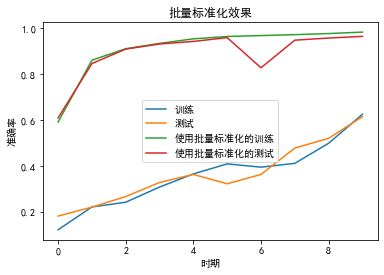

In [81]:
# 训练你的标准模型，存储其历史回调
h1_callback = standard_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)
# 训练你最近构建的批量标准化模型，并存储其历史回调
h2_callback = batchnorm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=0)
# 调用 compare_histories_acc，传入两个模型的历史记录
compare_histories_acc(h1_callback, h2_callback)

您可以看到，对于这个深度模型来说，批量标准化证明是很有用的，它帮助模型在最初的10个训练时期内获得了很高的准确度数值。



## 超参数调整
- 神经网络超参数
    - 层数量
    - 每层神经元数量
    - 层次顺序
    - 层激活函数
    - 批量大小
    - 学习率
    - 优化器
    - ...
- 神经网络超参数调整的建议
    - 随机搜索优于网格搜索
    - 不要使用太多时期
    - 使用数据集的较小样本
    - 尝试不同的批量大小、激活函数、优化器和学习率

### 调整模型超参数的准备
让我们调整一个表现良好的二元分类模型的超参数，该模型能够对乳腺癌数据集进行良好分类。

将模型转化为 Sklearn 估计器的第一步是构建一个创建模型的函数。该函数的定义非常重要，因为通过改变函数接收的参数来进行超参数调整。

构建一个简单的 `create_model()` 函数，该函数接收学习速率和激活函数作为参数。

In [94]:
# 根据激活函数和学习率创建模型
def create_model(learning_rate=0.01, activation='relu'):
    # 使用给定学习率创建一个 Adam 优化器
    opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    # 创建你的二元分类模型
    model = Sequential()
    model.add(Dense(128, input_shape=(30, ), activation=activation))
    model.add(Dense(256, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    
    # 使用指定的优化器、损失函数和评估指标编译你的模型
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

### 调整模型参数
现在是尝试在你的模型上使用不同参数并查看其表现的时候了！

你在之前练习中构建的 `create_model()` 函数已经准备就绪供你使用。

由于拟合 `RandomizedSearchCV` 对象会花费太长时间，你可以在 `show_results()` 函数中打印出结果。

在构建 `KerasClassifier` 对象时，不需要使用可选的 `epochs` 和 `batch_size` 参数，因为你已经将它们作为参数传递给了随机搜索，这已经起效果了。

In [95]:
from sklearn.datasets import load_breast_cancer
#返回特征和目标变量
X, y = load_breast_cancer(return_X_y=True)

In [96]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

# 创建一个Keras分类器
model = KerasClassifier(build_fn=create_model)

# 定义要尝试的参数
params = {
    'activation': ['relu', 'tanh'],
    'batch_size': [32, 128, 256],
    'epochs': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001]
}

# 创建一个随机搜索CV对象，并传入要尝试的参数
random_search = RandomizedSearchCV(model, param_distributions=params, cv=KFold(3))
random_search_results = random_search.fit(X, y, verbose=0)

# 输出结果
print("最佳结果: {} 使用参数: {}".format(random_search_results.best_score_,
                                 random_search_results.best_params_))

<ipython-input-96-5c8c939b7f26>:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


2/2 [==============================] - 0s 4ms/step - loss: 0.2116 - accuracy: 0.8889
最佳结果: 0.9261208573977152 使用参数: {'learning_rate': 0.01, 'epochs': 200, 'batch_size': 128, 'activation': 'relu'}


`KerasClassifier is deprecated, use Sci-Keras` 不建议使用，某些场景功能支持的不完善

### 使用交叉验证进行训练
现在是使用找到的最佳参数进行模型训练的时候了：学习率为 0.01，时期数为 200，批量大小为 128，并且激活函数为 `relu`。

你之前练习中的 `create_model()` 函数已经准备好供你使用。`X` 和 `y` 被加载作为特征和标签。

在创建 `KerasClassifier` 对象时，请使用找到的最佳数值，以便在进行交叉验证时使用它们。

通过在乳腺癌数据集上训练一个经过调优的出色模型来结束本关卡！

In [97]:
# 从 sklearn.model_selection 中导入 cross_val_score

from sklearn.model_selection import cross_val_score

# 创建一个 KerasClassifier
model = KerasClassifier(build_fn =create_model,epochs=200,batch_size=128)
# 计算每个折叠的准确率
kfolds = cross_val_score(model,X,y,cv=3)
# 输出平均准确率
print('平均准确率为: ', kfolds.mean())

# 输出准确率的标准差
print('标准差为: ', kfolds.std())

Epoch 1/200


<ipython-input-97-49fdcac2ed99>:6: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn =create_model,epochs=200,batch_size=128)


3/3 [==============================] - 1s 4ms/step - loss: 218.5223 - accuracy: 0.4063
Epoch 2/200
3/3 [==============================] - 0s 6ms/step - loss: 59.5759 - accuracy: 0.5673
Epoch 3/200
3/3 [==============================] - 0s 4ms/step - loss: 23.7044 - accuracy: 0.7018
Epoch 4/200
3/3 [==============================] - 0s 5ms/step - loss: 12.7630 - accuracy: 0.3034
Epoch 5/200
3/3 [==============================] - 0s 7ms/step - loss: 2.7816 - accuracy: 0.8100
Epoch 6/200
3/3 [==============================] - 0s 5ms/step - loss: 1.9144 - accuracy: 0.8100
Epoch 7/200
3/3 [==============================] - 0s 8ms/step - loss: 0.8931 - accuracy: 0.6834
Epoch 8/200
3/3 [==============================] - 0s 6ms/step - loss: 0.5529 - accuracy: 0.8021
Epoch 9/200
3/3 [==============================] - 0s 4ms/step - loss: 0.6360 - accuracy: 0.8813
Epoch 10/200
3/3 [==============================] - 0s 5ms/step - loss: 0.3934 - accuracy: 0.9103
Epoch 11/200
3/3 [==================